In [344]:
import pandas as pd
dataset  = pd.read_csv('Sentimentos_5Days.csv', encoding='latin-1')

In [345]:
dataset = dataset[['tweetText','Sentimento']]
print(len(dataset))
dataset = dataset.dropna()
print(len(dataset))

3576
3252


In [346]:
dataset.head()

,tweetText,Sentimento
0,"""Efeito Bolsonaro: Alckmin diz que vai facilit...",-1.0
1,"""Efeito Bolsonaro: Alckmin diz que vai facilit...",-1.0
2,"""Efeito Bolsonaro: Alckmin diz que vai facilit...",-1.0
3,"""O governo de Lula nunca foi de esquerda"", diz...",-1.0
4,"""O governo de Lula nunca foi de esquerda"", diz...",-1.0


In [ ]:
def text_preproc_complete(texto, lingua = 'portuguese'):
    from nltk.corpus import stopwords
    from nltk.tokenize import RegexpTokenizer
    from nltk.stem.snowball import SnowballStemmer
    import re
    tokenizer = RegexpTokenizer(r'\w+')
    stemmer = SnowballStemmer(lingua)
    stop_pt_br = stopwords.words(lingua)
    lista_tweet = ['bolsonaro','Bolsonaro','Lula','Luis Inacio', 'Luis Inacio Lula da Silva','Geraldo Alckmin','Alckmin'
        ,'Joaquim Barbosa','Ciro Gomes','ciro gomes','Ciro gomes','Marina Silva','marina silva','Paulo Rabello de Castro',
        'Paulo Rabello','Aldo Rebelo','Aldo rebelo','Henrique Meirelles','Meirelles','Michel Temer','Temer','Michell','Avila',
        'Flávio Rocha','Flávio rocha','Flavio Rocha','Rodrigo Maia','Álvaro Dias','Alvaro Dias','Manuela D’Ávila','Luís',
        'Manuela D’Avila','Guilherme Boulos','Boulos','João Amoêdo','João amoedo','Fernando Collor','Collor','Ávila','Inácio',
        'José Maria Eymael','Jose Maria Eymael','José Eymael','Levy Fidelix','Vera Lúcia','http','https','Álvaro','Amoê',
        'Dias','Inacio','Luis','Silva','João','José','Levy','Fidelix','Vera','Lúcia','Fernando','Collor','Joao','Manoela',
        'Joaquim','Barbosa','Geraldo','Alckmin','Ciro','Gomes','ciro','gomes','Marina','marina','Paulo','Manuela','Avila',
        'Rabello','Castro','Aldo','Rebelo','rebelo','Henrique','Meirelles','Michel','Temer','Flávio','Jose','Manuela Ávila',
        'rocha','Flavio','Rocha','Rodrigo','Maia','Guilherme','Boulos','Amoêdo','amoedo','Maria','Eymael',"RT",'Àvila','Ávila',
        'Jair',' Ávila']
    
    text = [word for word in texto.split() if (word not in lista_tweet and word not in stop_pt_br  and not word.startswith('#')
                                               and not word.startswith('@') and not word.startswith('http'))]
    text = ' '.join(tokenizer.tokenize(' '.join(text)))
    text = re.sub(r'\d+', '',text)
    text = re.sub(' +',' ',text)
#     text = [stemmer.stem(word) for word in text.split() if len(word) > 2 and word not in lista_tweet]
#     text = ' '.join(text)
    return(text)

In [348]:
#cria coluna de tweety tratado na base de entrada
corpus_tratado = []
for registro in dataset['tweetText']:
    corpus_tratado.append(text_preproc_complete(registro))
    
dataset['tweet_clean'] = corpus_tratado

In [349]:
#splita a base em treino e teste
from sklearn.model_selection import train_test_split
X = dataset.loc[:]['tweet_clean']
y = dataset.Sentimento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
X_teste2, X_val, y_teste2, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1234)

In [352]:
from sklearn.feature_extraction.text import TfidfVectorizer
#realiza o tdidf 
tfidf_transformer = TfidfVectorizer(lowercase=False,ngram_range=(1,3),encoding='latin-1')
X_train_tfidf = tfidf_transformer.fit_transform(X_train)

In [363]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
clf = MultinomialNB(alpha=0.6).fit(X_train_tfidf, y_train)
clf_tree = DecisionTreeClassifier().fit(X_train_tfidf, y_train)
clf_lda = LinearDiscriminantAnalysis().fit(X_train_tfidf.toarray(), y_train)
clf_rdf = RandomForestClassifier().fit(X_train_tfidf, y_train)
clf_gbm = GradientBoostingClassifier().fit(X_train_tfidf, y_train)
#'n_estimators': [200,400]
# 'criterion':['gini'],
# 'max_depth': [3,5,9],
# 'min_samples_split': [2,5,7,9,11,15],
# 'min_samples_leaf': [1,2,3,4,5,6,7]

# grid = GridSearchCV(estimator = DecisionTreeClassifier(),
#                     param_grid = {'criterion':['gini','entropy'],
#                                   'max_depth': [3,5,9,15,20],
#                                   'min_samples_split': [2,5,7,9,11,15,25,30],
#                                   'min_samples_leaf': [1,2,3,4,5,6,7,10,15]},
#                     scoring = make_scorer(accuracy_score),
#                     cv = KFold(n_splits= 5))
            
# grid.fit(X_train_tfidf.toarray(), y_train)
# classif_final = grid.best_estimator_
# fitter = grid.best_estimator_
# fitter.fit(X_train_tfidf, y_train)


C:\Users\ale_g\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [398]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# clf_rdf = RandomForestClassifier().fit(X_train_tfidf, y_train)
# clf_gbm = GradientBoostingClassifier().fit(X_train_tfidf, y_train)
#'n_estimators': [200,400]
# 'criterion':['gini'],
# 'max_depth': [3,5,9],
# 'min_samples_split': [2,5,7,9,11,15],
# 'min_samples_leaf': [1,2,3,4,5,6,7]

grid_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs = 8),
                    param_grid = {'n_estimators': [400,600,800,1000],
                                  'criterion':['gini','entropy'],
                                  'max_depth': [3,5,9,15,20],
                                  'min_samples_split': [2,5,7,9,11,15,25,30],
                                  'min_samples_leaf': [1,2,3,4,5,6,7,10,15]},
                    scoring = make_scorer(accuracy_score),
                    cv = KFold(n_splits= 5))
            
grid_rf.fit(X_train_tfidf.toarray(), y_train)
classif_final = grid_rf.best_estimator_
fitter_rf = grid_rf.best_estimator_
fitter_rf.fit(X_train_tfidf, y_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ale_g\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-398-c86c18396324>", line 19, in <module>
    grid_rf.fit(X_train_tfidf.toarray(), y_train)
  File "C:\Users\ale_g\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 639, in fit
    cv.split(X, y, groups)))
  File "C:\Users\ale_g\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 779, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\ale_g\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 625, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ale_g\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 588, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\ale_g\Anaconda3\lib\site-packages\sklearn\externals\joblib\_par


KeyboardInterrupt



In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

grid_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs = 8),
                    param_grid = {'n_estimators': [400,600,800,1000]
                                  'criterion':['gini','entropy'],
                                  'max_depth': [3,5,9,15,20],
                                  'min_samples_split': [2,5,7,9,11,15,25,30],
                                  'min_samples_leaf': [1,2,3,4,5,6,7,10,15]},
                    scoring = make_scorer(accuracy_score),
                    cv = KFold(n_splits= 5))
            
grid_rf.fit(X_train_tfidf.toarray(), y_train)
classif_final = grid_rf.best_estimator_
fitter_rf = grid_rf.best_estimator_
fitter_rf.fit(X_train_tfidf, y_train)

In [364]:
#Para novos dados apenas aplica o transform e nao o fit
X_new_tfidf = tfidf_transformer.transform(X_test)

predicted = clf.predict(X_new_tfidf)
predicted_tree = clf_tree.predict(X_new_tfidf)
# predicted_fitter = fitter.predict(X_new_tfidf)
predicted_lda = clf_lda.predict(X_new_tfidf)

In [365]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, make_scorer

<h3>MultinomialNB</h3>

In [366]:
pd.DataFrame(confusion_matrix(y_pred=predicted,y_true=y_test))

,0,1,2
0,238,41,9
1,22,410,4
2,15,28,209


In [367]:
accuracy_score(y_pred=predicted,y_true=y_test)

0.87807377049180324

<h3>Tree</h3>

In [358]:
pd.DataFrame(confusion_matrix(y_pred=predicted_tree,y_true=y_test))

,0,1,2
0,235,38,15
1,39,377,20
2,18,19,215


In [359]:
accuracy_score(y_pred=predicted_tree,y_true=y_test)

0.8473360655737705

<h3>LDA</h3>

In [360]:
pd.DataFrame(confusion_matrix(y_pred=predicted_lda,y_true=y_test))

,0,1,2
0,214,71,3
1,3,433,0
2,2,44,206


In [361]:
accuracy_score(y_pred=predicted_lda,y_true=y_test)

0.87397540983606559

<h3>Final Data test</h3>

In [33]:
final = pd.DataFrame(X_test)
final['resposta'] = predicted_lda
final['sentimento'] = y_test
final.head()

,tweet_clean,resposta,sentimento
1717,gilm acab orden soltur pret diretor ders acus ...,0.0,0.0
1158,até moment vint dois pré candidat president re...,0.0,0.0
694,supost supost serr supost réus supost pedal fi...,-1.0,-1.0
2029,,0.0,0.0
644,amoed men intençõ vot pesquis nom candidat,-1.0,-1.0


<h2>WordCloud</h2>

In [311]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [341]:
word_cloud_data = pd.read_csv('Sentimentos_5Days.csv', encoding='latin-1')

In [342]:
#cria coluna de tweety tratado na base de entrada
corpus_tratado_wc = []
for registro in word_cloud_data['tweetText']:
    corpus_tratado_wc.append(text_preproc_complete(registro))
    
word_cloud_data['tweet_clean'] = corpus_tratado_wc

Palavras Positivas


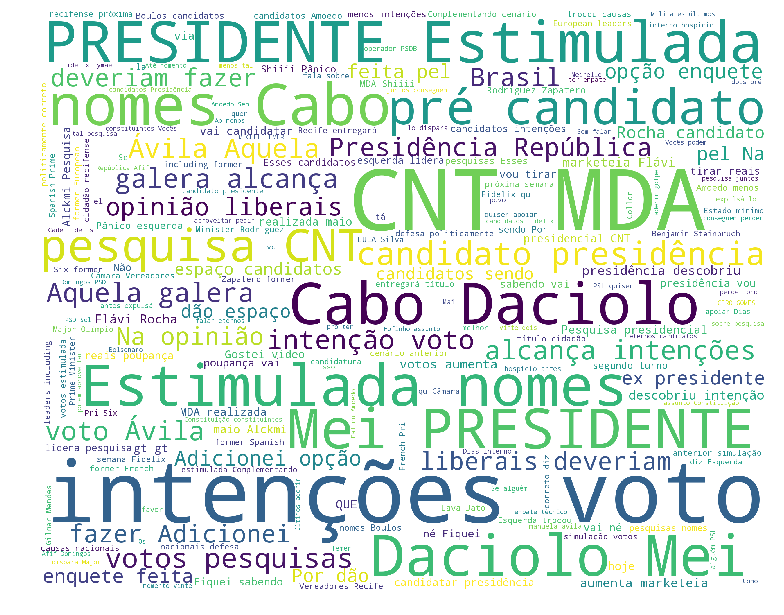

Palavras Negativas


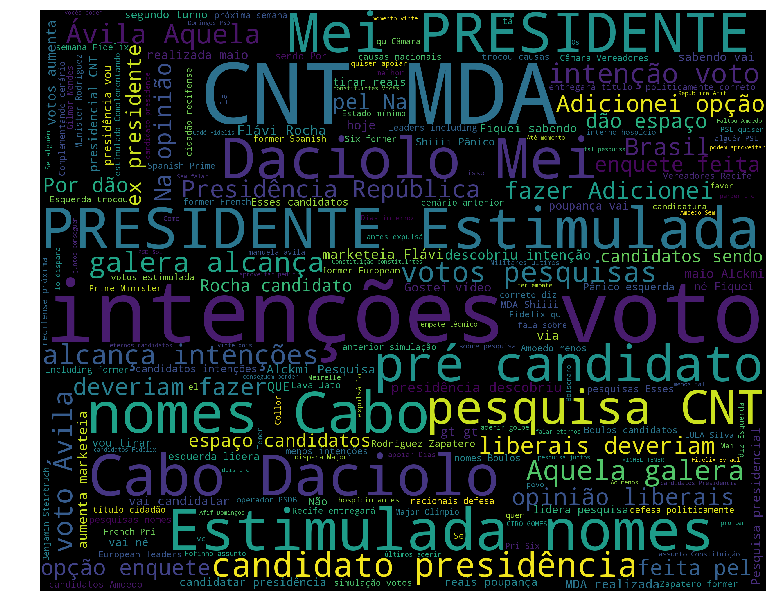

In [343]:
train_pos = word_cloud_data[word_cloud_data['Sentimento'] == 1]
train_pos = word_cloud_data['tweet_clean']
train_neg = word_cloud_data[word_cloud_data['Sentimento'] == -1]
train_neg = word_cloud_data['tweet_clean']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Palavras Positivas")
wordcloud_draw(train_pos,'white')
print("Palavras Negativas")
wordcloud_draw(train_neg)

<h1>RNN com Embedding Keras</h1>

In [302]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Input, Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

<h4>Import o dataset e faz um text clean</h4>

In [252]:
import pandas as pd
dataset  = pd.read_csv('Sentimentos_5Days.csv', encoding='latin-1',decimal='.')
dataset = dataset[['tweetText','Sentimento']]
# dataset = dataset.loc[dataset.Sentimento != 0][:]
dataset = dataset.dropna()

#cria coluna de tweety tratado na base de entrada
corpus_tratado = []
for registro in dataset['tweetText']:
    corpus_tratado.append(text_preproc_complete(registro))
    
dataset['tweet_clean'] = corpus_tratado

<h4>Transforma os targets do sentimento em texto</h4>

In [253]:
dataset.Sentimento = dataset.Sentimento.replace(0,'Neutral')
dataset.Sentimento = dataset.Sentimento.replace(-1,'Negative')
dataset.Sentimento = dataset.Sentimento.replace(1,'Positive')

<h4>Faz mais um data clean (redundancia) depois transforma cada tweet em um vetor de 2000 palavras para normalizar todo mundo
e nesse vetor faz uma conversao de palavras para numeros</h4>

In [254]:
# dataset = dataset[dataset.Sentimento != "Neutral"]
dataset['tweet_clean'] = dataset['tweet_clean'].apply(lambda x: x.lower())
dataset['tweet_clean'] = dataset['tweet_clean'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(dataset[ dataset['Sentimento'] == 'Positive'].size)
print(dataset[ dataset['Sentimento'] == 'Neutral'].size)
print(dataset[ dataset['Sentimento'] == 'Negative'].size)

# for idx,row in dataset.iterrows():
#     row[0] = row[0].replace('rt',' ')
    
max_fatures = 5000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(dataset['tweet_clean'].values)
X = tokenizer.texts_to_sequences(dataset['tweet_clean'].values)
X = pad_sequences(X)

2388
4428
2940


<h4>Cria a RNN com algumas alterações. Primeira camada faz um embedding e aqui precisa pasar as dimensoes do embedding e o tamanho da input layer. Adiciona drop out em varias camadas, usa uma camada de lstm, e depois camadas intermediarias até a camada de output com o número de classes e um softmax para dar a probabilidade</h4>

In [255]:
embed_dim = 256
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(30,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 21, 256)           1280000   
_________________________________________________________________
spatial_dropout1d_9 (Spatial (None, 21, 256)           0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 196)               355152    
_________________________________________________________________
dense_20 (Dense)             (None, 30)                5910      
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 93        
Total params: 1,641,155
Trainable params: 1,641,155
Non-trainable params: 0
_________________________________________________________________
None


<h4>Splita a base em treino e teste</h4>

In [256]:
#splita a base em treino e teste
from sklearn.model_selection import train_test_split
y = pd.get_dummies(dataset['Sentimento']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
X_teste2, X_val, y_teste2, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1234)

In [257]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2276, 21) (2276, 3)
(976, 21) (976, 3)


<h4>Treina o modelo</h4>

In [258]:
batch_size = 64
model.fit(X_train, y_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
 - 11s - loss: 1.0034 - acc: 0.5141
Epoch 2/10
 - 7s - loss: 0.5180 - acc: 0.8120
Epoch 3/10
 - 7s - loss: 0.1812 - acc: 0.9376
Epoch 4/10
 - 7s - loss: 0.1053 - acc: 0.9692
Epoch 5/10
 - 6s - loss: 0.0688 - acc: 0.9815
Epoch 6/10
 - 6s - loss: 0.0570 - acc: 0.9815
Epoch 7/10
 - 7s - loss: 0.0566 - acc: 0.9846
Epoch 8/10
 - 7s - loss: 0.0345 - acc: 0.9873
Epoch 9/10
 - 7s - loss: 0.0414 - acc: 0.9846
Epoch 10/10
 - 7s - loss: 0.0346 - acc: 0.9873


In [260]:
# validation_size = 100

# X_validate = X_test[-validation_size:]
# Y_validate = y_test[-validation_size:]
# X_test = X_test[:-validation_size]
# y_test = y_test[:-validation_size]
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("score: %.4f" % (score))
print("acc: %.4f" % (acc))

score: 0.4807
acc: 0.8689


In [370]:
twt = ['Eu gostaria de saber qual a proposta do Lula']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=X.shape[1], dtype='int32', value=0)
# print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)
if(np.argmax(sentiment) == 0):
    print("Negativo")
elif (np.argmax(sentiment) == 1):
    print("Neutro")
elif (np.argmax(sentiment) == 2):
    print("Positivo")

IndexError: tuple index out of range

<h3>Word2word</h3>

In [272]:
from gensim.models import Word2Vec, KeyedVectors

In [277]:
word_vectors = KeyedVectors.load_word2vec_format('skip_s300.txt', binary=False)

In [308]:
embed_dim = 256
lstm_out = 196

pretrained_weights = word_vectors.wv.syn0
vocab_size, emdedding_size = pretrained_weights.shape

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[pretrained_weights]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(30,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

C:\Users\ale_g\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
C:\Users\ale_g\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 300)         280489800 
_________________________________________________________________
spatial_dropout1d_11 (Spatia (None, None, 300)         0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 196)               389648    
_________________________________________________________________
dense_25 (Dense)             (None, 30)                5910      
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 93        
Total params: 280,885,451
Trainable params: 280,885,451
Non-trainable params: 0
_________________________________________________________________
None


In [309]:
batch_size = 64
model.fit(X_train, y_train, epochs = 10, batch_size=batch_size, verbose = 2)

C:\Users\ale_g\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 280489800 elements. This may consume a large amount of memory.
  "This may consume a large amount of memory." % num_elements)


Epoch 1/10
 - 174s - loss: 1.0172 - acc: 0.4886
Epoch 2/10
 - 162s - loss: 0.6616 - acc: 0.7272
Epoch 3/10
 - 163s - loss: 0.3904 - acc: 0.8475
Epoch 4/10
 - 165s - loss: 0.2910 - acc: 0.8919
Epoch 5/10
 - 163s - loss: 0.2105 - acc: 0.9257
Epoch 6/10
 - 160s - loss: 0.1510 - acc: 0.9561
Epoch 7/10
 - 160s - loss: 0.1268 - acc: 0.9556
Epoch 8/10
 - 161s - loss: 0.0926 - acc: 0.9675
Epoch 9/10
 - 161s - loss: 0.0741 - acc: 0.9763
Epoch 10/10
 - 161s - loss: 0.0832 - acc: 0.9732


In [310]:
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("score: %.4f" % (score))
print("acc: %.4f" % (acc))

score: 0.4547
acc: 0.8617
